In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import dtype
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from random import randrange, uniform
from  sklearn.metrics import accuracy_score,confusion_matrix, classification_report, recall_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek

In [2]:
df_test = pd.read_csv("M:/SOL/ML_intern_task/Dataset/mitbih_test.csv")
df_train = pd.read_csv("M:/SOL/ML_intern_task/Dataset/mitbih_train.csv")
df_abn = pd.read_csv("M:/SOL/ML_intern_task/Dataset/ptbdb_abnormal.csv")
df_n = pd.read_csv("M:/SOL/ML_intern_task/Dataset/ptbdb_normal.csv")

## Perform EDA

Shape of datasets

In [3]:
print(df_train.shape)
print(df_test.shape)
print(df_abn.shape)
print(df_n.shape)

(87553, 188)
(21891, 188)
(10505, 188)
(4045, 188)


In [4]:
df_train.describe()

,9.779411554336547852e-01,9.264705777168273926e-01,6.813725233078002930e-01,2.450980395078659058e-01,1.544117629528045654e-01,1.911764740943908691e-01,1.519607901573181152e-01,8.578431606292724609e-02,5.882352963089942932e-02,4.901960864663124084e-02,...,0.000000000000000000e+00.79,0.000000000000000000e+00.80,0.000000000000000000e+00.81,0.000000000000000000e+00.82,0.000000000000000000e+00.83,0.000000000000000000e+00.84,0.000000000000000000e+00.85,0.000000000000000000e+00.86,0.000000000000000000e+00.87,0.000000000000000000e+00.88
count,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,...,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000
mean,0.890359,0.758158,0.423969,0.219104,0.201127,0.210399,0.205809,0.201774,0.198693,0.196758,...,0.005025,0.004628,0.004291,0.003945,0.003681,0.003471,0.003221,0.002945,0.002807,0.473382
std,0.240910,0.221814,0.227305,0.206880,0.177058,0.171910,0.178482,0.177241,0.171778,0.168358,...,0.044155,0.042089,0.040525,0.038651,0.037193,0.036255,0.034790,0.032865,0.031924,1.143190
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.921922,0.682482,0.250965,0.048458,0.082329,0.088415,0.073333,0.066116,0.065000,0.068643,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.991342,0.826007,0.429467,0.165992,0.147870,0.158798,0.145320,0.144424,0.150000,0.148734,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910506,0.578767,0.341727,0.258993,0.287634,0.298246,0.295393,0.290837,0.283636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [5]:
df_test.describe()

,1.000000000000000000e+00,7.582644820213317871e-01,1.115702465176582336e-01,0.000000000000000000e+00,8.057851344347000122e-02,7.851240038871765137e-02,6.611569970846176147e-02,4.958677664399147034e-02,4.752065986394882202e-02,3.512396663427352905e-02,...,0.000000000000000000e+00.56,0.000000000000000000e+00.57,0.000000000000000000e+00.58,0.000000000000000000e+00.59,0.000000000000000000e+00.60,0.000000000000000000e+00.61,0.000000000000000000e+00.62,0.000000000000000000e+00.63,0.000000000000000000e+00.64,0.000000000000000000e+00.65
count,21891.000000,21891.000000,21891.000000,21891.000000,21891.000000,21891.000000,21891.000000,21891.000000,21891.000000,21891.000000,...,21891.000000,21891.000000,21891.000000,21891.000000,21891.000000,21891.000000,21891.000000,21891.000000,21891.000000,21891.000000
mean,0.894405,0.761902,0.426641,0.221606,0.201682,0.209897,0.204811,0.200999,0.197640,0.196030,...,0.004588,0.004328,0.004020,0.003789,0.003639,0.003459,0.003167,0.003000,0.002946,0.473711
std,0.234564,0.218664,0.228568,0.208710,0.177730,0.172195,0.177948,0.176143,0.170229,0.166707,...,0.043129,0.042188,0.040256,0.039398,0.038536,0.037718,0.035904,0.035523,0.035267,1.143469
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.924254,0.683355,0.251220,0.050514,0.082873,0.087912,0.072678,0.066003,0.064516,0.068506,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.990431,0.828996,0.432781,0.167641,0.147651,0.158120,0.144068,0.144509,0.150442,0.149038,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.912320,0.583994,0.347097,0.259227,0.287356,0.298456,0.294566,0.289907,0.282966,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.991429,...,0.980392,1.000000,0.966102,1.000000,1.000000,1.000000,1.000000,0.996053,1.000000,4.000000


copied datsets to another datframe 👇

In [6]:
df1 = df_train
df2 = df_test
df3 = df_abn
df4 = df_n

Giving name to the columns

In [7]:
m,n = df1.shape
print(m,n)
col_name = []
for i in range(n):
    if i == n-1:
        col_name.append('target')
    else:
        col_name.append('feature'+str(i))
df1.columns = col_name

87553 188


In [8]:
df_train.corr()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature178,feature179,feature180,feature181,feature182,feature183,feature184,feature185,feature186,target
feature0,1.000000,0.778516,0.141261,-0.134789,-0.243920,-0.352727,-0.430697,-0.480056,-0.521887,-0.559847,...,-0.051550,-0.044222,-0.039223,-0.035047,-0.035090,-0.035739,-0.035558,-0.033900,-0.032958,-0.166173
feature1,0.778516,1.000000,0.501524,-0.024287,-0.148469,-0.164901,-0.234435,-0.285256,-0.322702,-0.341301,...,-0.019323,-0.013355,-0.009154,-0.007510,-0.008673,-0.010174,-0.010692,-0.010115,-0.009986,-0.183439
feature2,0.141261,0.501524,1.000000,0.672401,0.402177,0.345929,0.281484,0.206475,0.138567,0.077515,...,-0.018529,-0.020626,-0.021477,-0.025591,-0.029118,-0.030465,-0.031461,-0.033108,-0.034740,0.252183
feature3,-0.134789,-0.024287,0.672401,1.000000,0.819908,0.596828,0.475922,0.389029,0.292551,0.199310,...,-0.017025,-0.024396,-0.028907,-0.036101,-0.041249,-0.042956,-0.043560,-0.045399,-0.046860,0.508487
feature4,-0.243920,-0.148469,0.402177,0.819908,1.000000,0.881908,0.750680,0.663960,0.563274,0.448297,...,0.020470,0.010719,0.003458,-0.006081,-0.012639,-0.015319,-0.016064,-0.019551,-0.020914,0.508452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
feature183,-0.035739,-0.010174,-0.030465,-0.042956,-0.015319,0.005908,0.005361,0.015439,0.023274,0.016165,...,0.738338,0.783177,0.832192,0.895911,0.958530,1.000000,0.953214,0.893247,0.855729,0.037706
feature184,-0.035558,-0.010692,-0.031461,-0.043560,-0.016064,0.004372,0.003805,0.014075,0.022634,0.015332,...,0.714502,0.753969,0.796068,0.848370,0.903837,0.953214,1.000000,0.948725,0.904684,0.038890
feature185,-0.033900,-0.010115,-0.033108,-0.045399,-0.019551,0.000171,0.000037,0.010937,0.020453,0.012893,...,0.693137,0.727363,0.764190,0.809050,0.852634,0.893247,0.948725,1.000000,0.965155,0.038924
feature186,-0.032958,-0.009986,-0.034740,-0.046860,-0.020914,-0.001334,-0.001226,0.010156,0.020294,0.012734,...,0.679757,0.711386,0.744049,0.783552,0.822765,0.855729,0.904684,0.965155,1.000000,0.038146


In [9]:
df1.iloc[500:550,130:145]

,feature130,feature131,feature132,feature133,feature134,feature135,feature136,feature137,feature138,feature139,feature140,feature141,feature142,feature143,feature144
500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
501,0.882353,0.905882,0.891176,0.908824,0.882353,0.905882,0.900000,0.923529,0.902941,0.941176,0.917647,0.947059,0.938235,0.964706,0.955882
502,0.745714,0.728571,0.757143,0.751429,0.768571,0.771429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
503,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
504,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
505,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
506,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
507,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
508,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
509,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [10]:
df1.columns

Index(['feature0', 'feature1', 'feature2', 'feature3', 'feature4', 'feature5',
       'feature6', 'feature7', 'feature8', 'feature9',
       ...
       'feature178', 'feature179', 'feature180', 'feature181', 'feature182',
       'feature183', 'feature184', 'feature185', 'feature186', 'target'],
      dtype='object', length=188)

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87553 entries, 0 to 87552
Columns: 188 entries, feature0 to target
dtypes: float64(188)
memory usage: 125.6 MB


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


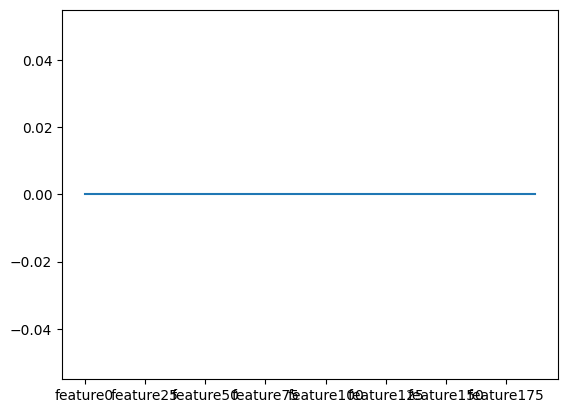

In [12]:
#if there are any NULL values in the dataset
df_train.isnull().sum().plot().legend().set_visible(False)

In [ ]:
df_test.isnull().sum().plot().legend().set_visible(False)

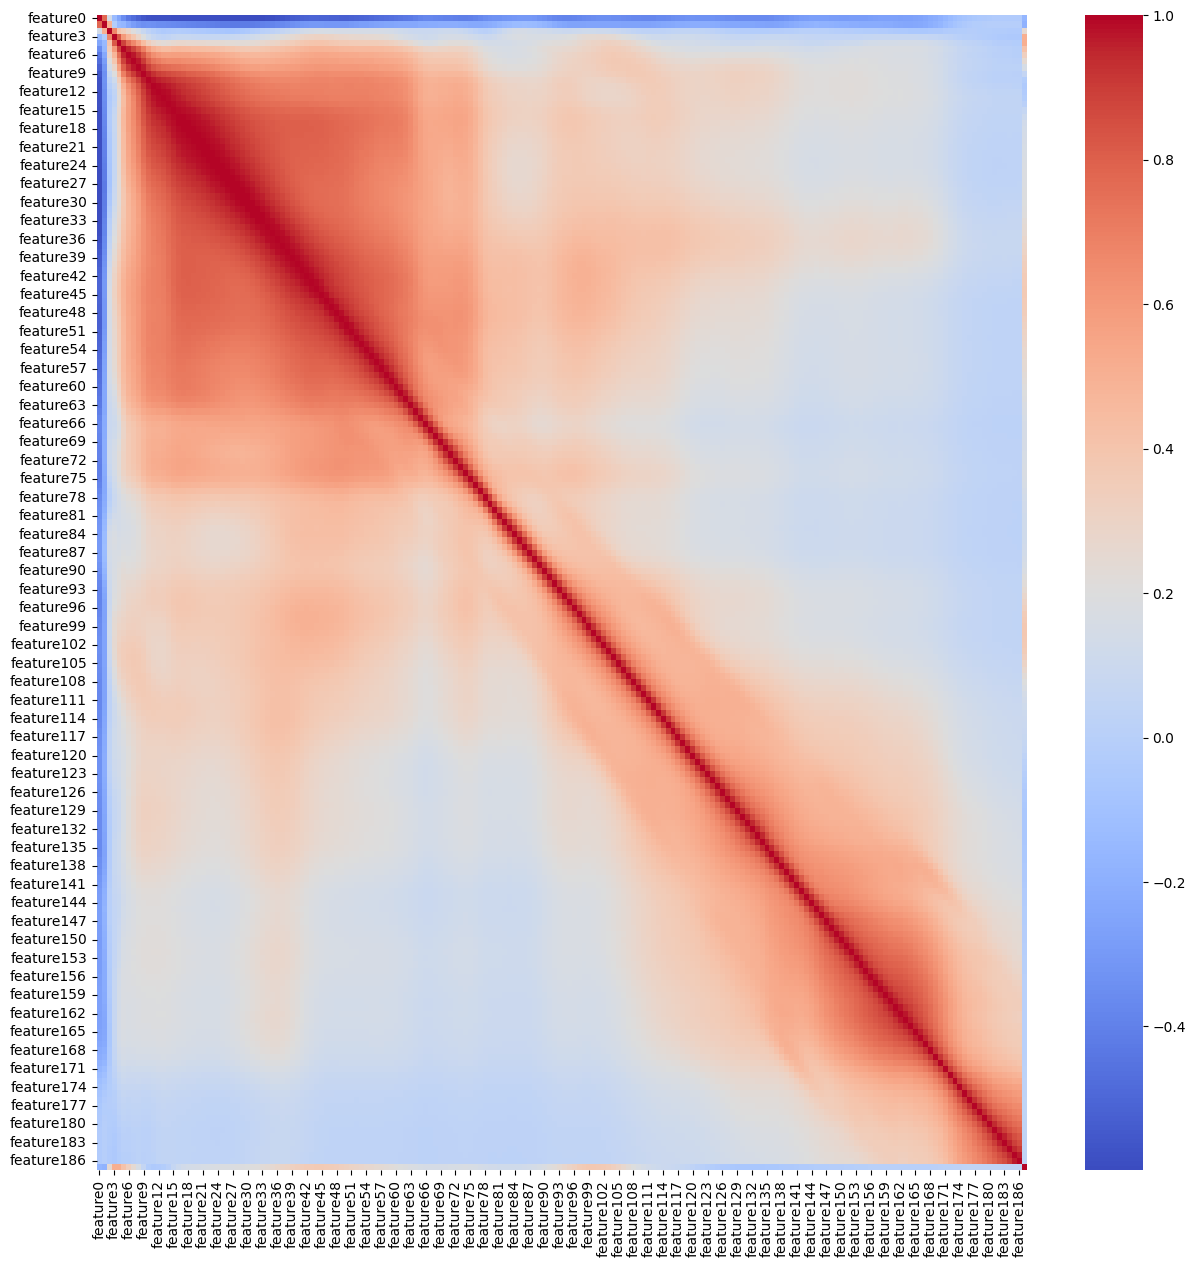

In [13]:
corr = df1.corr(method='pearson')
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.show()

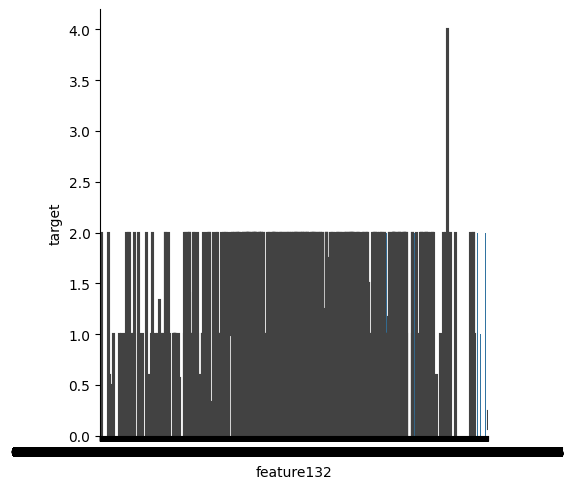

In [14]:
sns.catplot(data=df1, x="feature132", y="target", kind='bar')

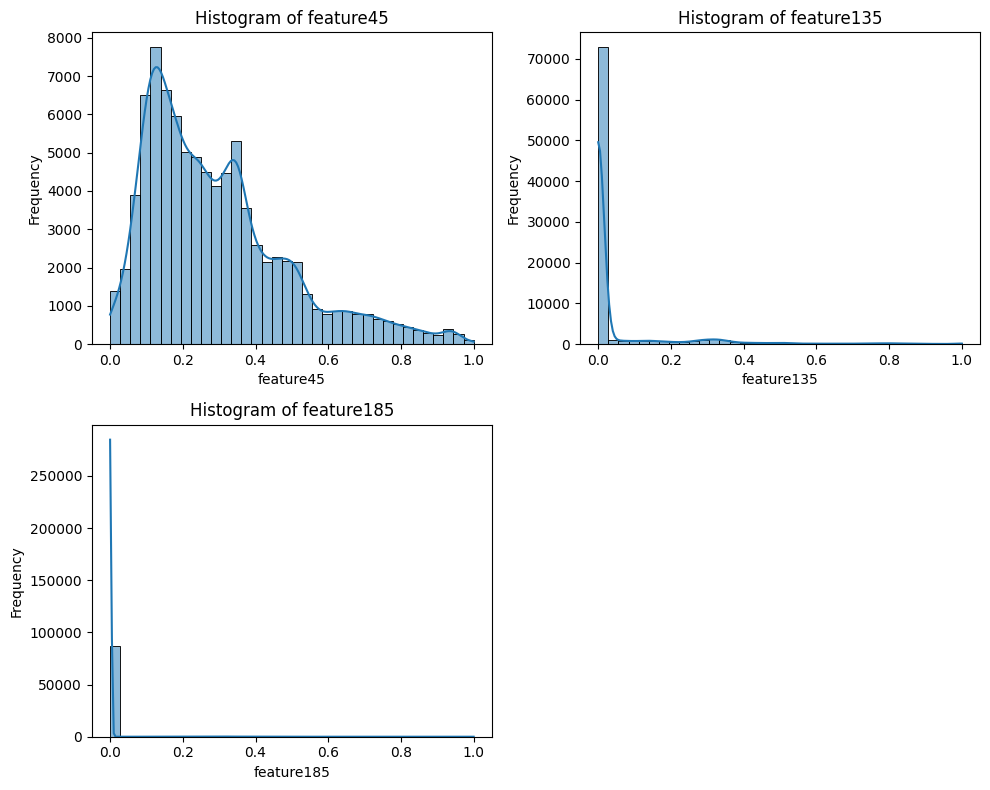

In [15]:
subset_features = ['feature45', 'feature135', 'feature185']  
n = len(subset_features)
cols = 2
rows = (n//cols)+(n%cols>0)

plt.figure(figsize=(10, 4 * rows))

for i, feature in enumerate(subset_features, 1):
    plt.subplot(rows, cols, i)  
    sns.histplot(df1[feature], kde=True, bins=36) 
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()  
plt.show()

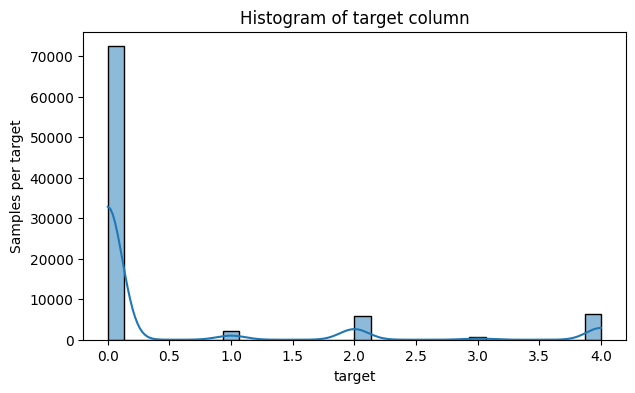

In [16]:
target_col = 'target'
plt.figure(figsize=(7, 4))
sns.histplot(df1["target"], kde=True, bins=30)  # Set bins as needed
plt.title(f'Histogram of {target_col} column')
plt.xlabel(target_col)
plt.ylabel('Samples per target')
plt.show()

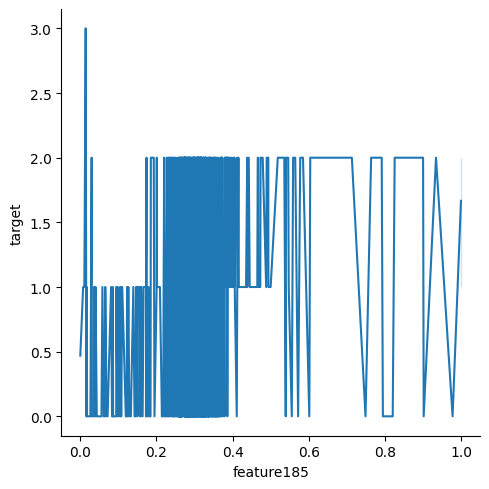

In [17]:
sns.relplot(data=df1, x = "feature185", y = "target", kind="line")

In [75]:
#pd.pivot_table(df1, values='target')
#last_column_name = df1.columns[-1]
#last_column = df1.loc[:, last_column_name]
#df1_category = pd.Series(df1[:,-1], dtype = 'category')

In [18]:
#df1.iloc[:,:-1].shape
X_df1 = df1.iloc[:,:-1]
y_df1 = df1.iloc[:,-1:]

In [24]:
y_df1['target'].unique()

array([0., 1., 2., 3., 4.])

In [26]:
X_df1.shape, y_df1.shape

((87553, 187), (87553, 1))

In [19]:
df1_cats = {}

categories = df1['target'].unique()
for category in categories:
    df1_cats[category] = df_train[df_train['target'] == category]


In [20]:
df1_cats.keys()

dict_keys([0.0, 1.0, 2.0, 3.0, 4.0])

In [21]:
k_df1 = len(df1_cats)
k_df1, df1_cats.keys()

(5, dict_keys([0.0, 1.0, 2.0, 3.0, 4.0]))

In [22]:
df1_cats_1 = df1_cats[0]
df1_cats_2 = df1_cats[1]
df1_cats_3 = df1_cats[2]
df1_cats_4 = df1_cats[3]
df1_cats_5 = df1_cats[4]

In [23]:
df1_cats_1.shape, df1_cats_2.shape, df1_cats_3.shape, df1_cats_4.shape, df1_cats_5.shape

((72470, 188), (2223, 188), (5788, 188), (641, 188), (6431, 188))

In [24]:
df1_cats_concat = pd.concat([df1_cats_1, df1_cats_2, df1_cats_3, df1_cats_4, df1_cats_5], axis=0)

In [ ]:
df1_cats_concat

In [ ]:
df1_cats_concat.describe()

In [ ]:
target = df1['target']
plt.figure(figsize=(15, 10))
for feature in X_df1.columns:
    sns.catplot(
        data=df1,x=feature ,y='target', hue="target", kind="count",
        palette="pastel", edgecolor=".6",
    )


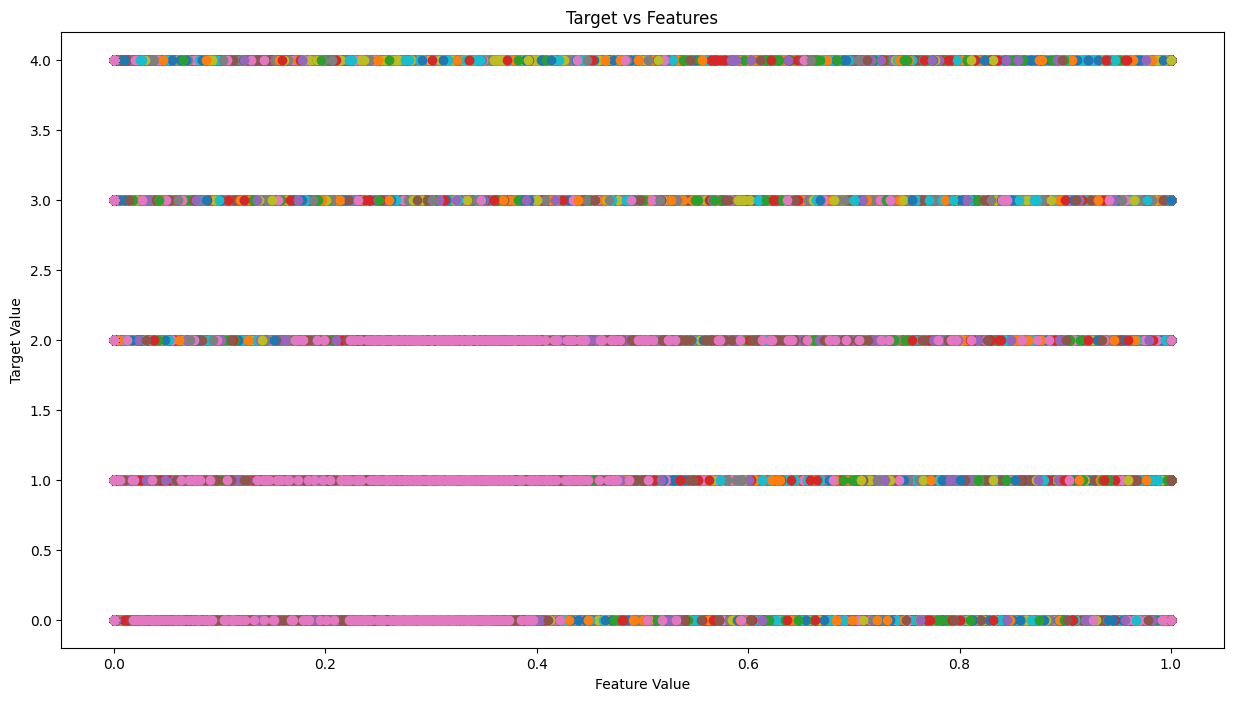

In [24]:

target = df1.columns[-1]

plt.figure(figsize=(15,8))

for feature in X_df1.columns:  
    plt.scatter(df1[feature], df1[target],
                label = feature)
    
plt.xlabel("Feature Value")
plt.ylabel("Target Value")
plt.title("Target vs Features")
plt.legend().set_visible(False)  
plt.show()

### MIT_BIH Train Data 

In [ ]:
df_train_unique = df_train.iloc[:,-1].unique()
df_train_unique

In [ ]:
df_train.isnull().sum() 

In [ ]:
df_train.describe()#.iloc[:,80:100]

In [15]:
stats = df_train.describe()
spc_stats = stats.loc[['mean', 'std','25%','50%','75%']]
#print(spc_stats)

In [ ]:
spc_stats.plot().legend().set_visible(False)

### MIT_BIH Test Data 

In [ ]:
df_test

In [ ]:
df_test.isnull().sum()

In [ ]:
df_test.describe()

In [ ]:
df_test_unique = df_test.iloc[:,-1].unique()
df_test_unique

In [23]:
stats2 = df_test.describe()
spc_stats2 = stats2.loc[['mean', 'std','25%','50%','75%']]

In [ ]:
spc_stats2.plot().legend().set_visible(False)

### PTB Diagnosotic abnormal ecg data

In [25]:
df_abn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10505 entries, 0 to 10504
Columns: 188 entries, 9.322328567504882812e-01 to 1.000000000000000000e+00.1
dtypes: float64(188)
memory usage: 15.1 MB


In [ ]:
df_abn

In [ ]:
df_abn.describe()

In [ ]:
df_abn.isnull().sum()

In [23]:
spc_stats3 = df_abn.describe().loc[['mean', 'std','25%','50%','75%']]

In [ ]:
spc_stats3.plot().legend().set_visible(False)

### PTB Diagnosotic normal ecg data

In [ ]:
df_n.head(5)
#df_n

In [ ]:
df_n.describe()

In [ ]:
df_n.isnull().sum()

In [28]:
spc_stats4 = df_n.describe().loc[['mean', 'std','25%','50%','75%']]

In [ ]:
spc_stats4.plot().legend().set_visible(False)

In [46]:
#sns.boxplot(x=df_train.iloc[180]) 

# Finding Outliers 

In [29]:
from scipy import stats

Z-Score

In [30]:
z_scores = stats.zscore(df_train, axis = 1)
outliers_mask = (np.abs(z_scores)>3).any(axis = 1)
outliers = df_train[outliers_mask]

In [ ]:
outliers.describe()

In [ ]:
#print(outliers.shape)
#outliers.iloc[:,:].plot().legend().set_visible(False)

Interquartile Range (IQR)

In [ ]:
Q1 = df_train.quantile(0.25)
Q3 = df_train.quantile(0.75)
IQR = Q3 - Q1

outliers_bool = (df_train < (Q1 - 1.5 * IQR)) | (df_train > (Q3 + 1.5 * IQR))

outliers_count_per_column = outliers_bool.sum()
count = 0
for i in range(len(outliers_count_per_column)):
    if outliers_count_per_column.iloc[i] > 0:
        count+=1
        print(outliers_count_per_column.iloc[i])
print(f"No. of Columns with ouliers: {count}")

In [ ]:
rows_with_outliers = outliers_bool.any(axis=1)
outliers_2 = df_train[rows_with_outliers]
outliers_2


In [ ]:
outliers_2.describe()

In [111]:
#outliers_2.plot().legend().set_visible(False)

The df_train is labeled because the last column of dftrain has 5 unique values. And about unique values in this case that's not so important

# Apply Supervised learning

## MIT_BIH

In [25]:
df_train.shape, df1.shape

((87553, 188), (87553, 188))

### Apply SMOTE for ovesampling 

In [26]:
X1  = df_train.iloc[:,:-1]
y1 = df_train.iloc[:,-1]

In [27]:
df_train_smote = SMOTE(random_state=42)
X1_oversmpl, y1_oversmpl = df_train_smote.fit_resample(X1, y1) # type: ignore

In [28]:
#X1_oversmpl.shape, y1_oversmpl.shape

((362350, 187), (362350,))

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X1_oversmpl, y1_oversmpl, test_size=0.2, random_state=42, stratify=y1_oversmpl)

#### PCA

In [52]:
X_train_pca = PCA(n_components=2).fit_transform(X_train)
X_test_pca = PCA(n_components=2).fit_transform(X_test)

### Model

In [29]:
model = LogisticRegression(solver='liblinear',max_iter=100, random_state=0)

In [30]:
def model_run(X_train, X_test, y_train, y_test, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred, normalize='all')
    class_report = classification_report(y_test, y_pred)
    return accuracy,confusion_mat,class_report

In [31]:
accuracy,confusion_mat,class_report = model_run(X_train, X_test, y_train, y_test, model)

Model Summary

In [32]:
print(f'Accuracy: {accuracy}')

Accuracy: 0.7842279563957499


In [33]:
print(class_report)

              precision    recall  f1-score   support

         0.0       0.61      0.63      0.62     14494
         1.0       0.82      0.72      0.77     14494
         2.0       0.75      0.75      0.75     14494
         3.0       0.82      0.89      0.85     14494
         4.0       0.93      0.92      0.93     14494

    accuracy                           0.78     72470
   macro avg       0.79      0.78      0.78     72470
weighted avg       0.79      0.78      0.78     72470



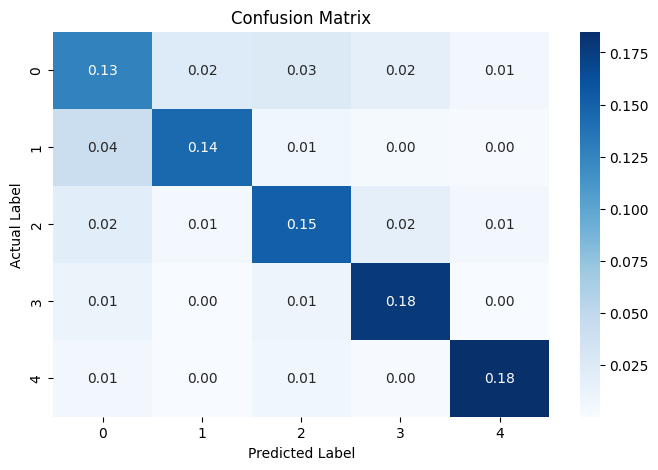

In [34]:
#normalized confusion matrix plot
plt.figure(figsize=(8,5))
sns.heatmap(confusion_mat, annot=True, fmt="0.2f", cmap="Blues", xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

### Apply Tomek for undersampling

In [35]:
df_train_Tmk = TomekLinks()
X1_Tomek, y1_Tomek = df_train_Tmk.fit_resample(X1, y1) #type: ignore

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X1_Tomek, y1_Tomek, test_size=0.2, random_state=42, stratify=y1_Tomek)

In [40]:
accuracy,confusion_mat,class_report = model_run(X_train, X_test, y_train, y_test, model)

Model Summary

In [42]:
print(f'Accuracy: {accuracy}')

Accuracy: 0.9075987144168962


In [43]:
print(class_report)

              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     14455
         1.0       0.72      0.19      0.31       421
         2.0       0.63      0.30      0.41      1139
         3.0       0.82      0.07      0.13       128
         4.0       0.96      0.88      0.92      1281

    accuracy                           0.91     17424
   macro avg       0.81      0.49      0.54     17424
weighted avg       0.89      0.91      0.89     17424



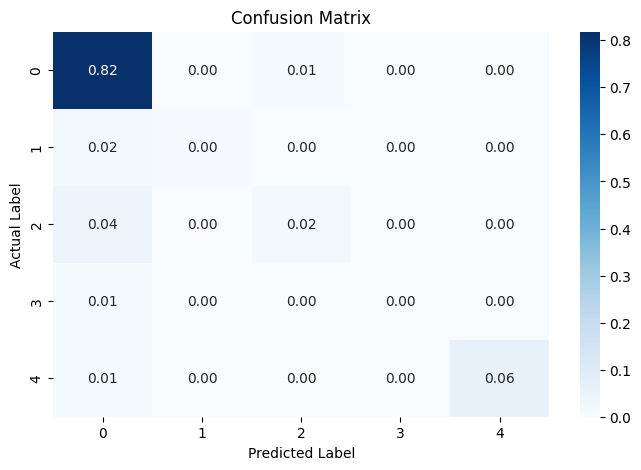

In [44]:
#normalized confusion matrix plot
plt.figure(figsize=(8,5))
sns.heatmap(confusion_mat, annot=True, fmt="0.2f", cmap="Blues", xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

### Apply SMOTE_Tomek

In [46]:
df_train_smotek = SMOTETomek(random_state=42)
X1_smotek, y1_smotek = df_train_smotek.fit_resample(X1, y1) #type: ignore

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X1_smotek, y1_smotek, test_size=0.2, random_state=42, stratify=y1_smotek)

In [48]:
accuracy,confusion_mat,class_report = model_run(X_train, X_test, y_train, y_test, model)

In [49]:
print(f'Accuracy: {accuracy}')
print(class_report)

Accuracy: 0.7847799089278322
              precision    recall  f1-score   support

         0.0       0.61      0.64      0.62     14494
         1.0       0.82      0.72      0.77     14494
         2.0       0.75      0.75      0.75     14494
         3.0       0.82      0.89      0.85     14494
         4.0       0.93      0.93      0.93     14494

    accuracy                           0.78     72470
   macro avg       0.79      0.78      0.78     72470
weighted avg       0.79      0.78      0.78     72470



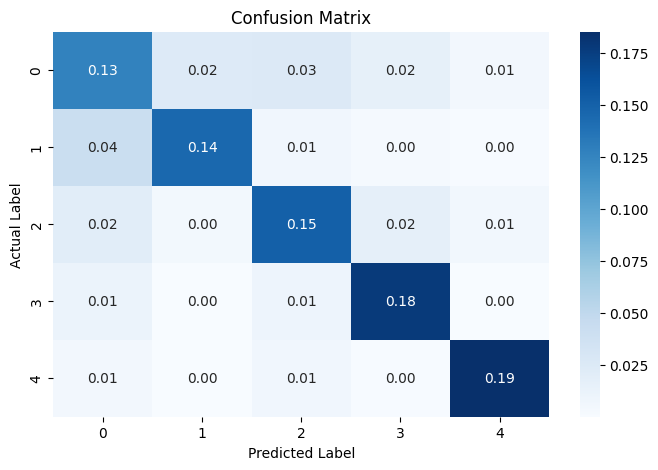

In [50]:
#normalized confusion matrix plot
plt.figure(figsize=(8,5))
sns.heatmap(confusion_mat, annot=True, fmt="0.2f", cmap="Blues", xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

## Hyperparameter Tuning

### RandomSearchCV

In [94]:
from sklearn.model_selection import RandomizedSearchCV

In [81]:

# Defining the parameter grid for RandomizedSearchCV
param_grid = {
    'solver': ['lbfgs', 'saga', 'newton-cg'],  # Add other solvers if appropriate for your dataset
    'C': np.logspace(-4, 4, 20),  # Regularization strengths
    'penalty': ['l2'],  # Adjust based on solver compatibility
}

# Setting up RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=60, cv=5, 
                                   verbose=2, random_state=42, n_jobs=-1)

# Fitting the model
random_search.fit(X_train, y_train)

# Best parameters found by RandomizedSearchCV
print("Best Parameters: ", random_search.best_params_)

# Predicting with the best estimator
y_pred = random_search.predict(X_test)

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Printing the results
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{confusion_mat}")
print(f'Classification Report:\n{class_report}')


Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Parameters:  {'solver': 'saga', 'penalty': 'l2', 'C': 78.47599703514607}
Accuracy: 0.915881445948261
Confusion Matrix:
[[14309    31   202     7    28]
 [  209   187    21     0     1]
 [  701     4   385    14    16]
 [  102     0    11    39     0]
 [  112     1    13     0  1118]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95     14577
         1.0       0.84      0.45      0.58       418
         2.0       0.61      0.34      0.44      1120
         3.0       0.65      0.26      0.37       152
         4.0       0.96      0.90      0.93      1244

    accuracy                           0.92     17511
   macro avg       0.80      0.59      0.65     17511
weighted avg       0.90      0.92      0.91     17511



m:\SOL\ML_intern_task\VENV_for_ECG\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### Grid Search CV

In [95]:
from sklearn.model_selection import GridSearchCV

In [96]:
# Defining the parameter grid for GridSearchCV
from turtle import mode


param_grid = {
    'solver': ['lbfgs', 'saga', 'newton-cg'],  # Consider solver compatibility with penalty
    'C': np.logspace(-4, 4, 20),  # Regularization strength
    'penalty': ['l2'],  # L2 is used by the solvers mentioned
}

# Setting up GridSearchCV
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# Fitting GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Best parameters found by GridSearchCV
print("Best Parameters: ", grid_search.best_params_)

# Using the best estimator found to make predictions
y_pred = grid_search.predict(X_test)

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Printing the results
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{confusion_mat}")
print(f'Classification Report:\n{class_report}')

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Parameters:  {'C': 78.47599703514607, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy: 0.9159956598709382
Confusion Matrix:
[[14304    31   206     7    29]
 [  208   187    22     0     1]
 [  696     5   388    15    16]
 [   95     0    11    46     0]
 [  113     3    13     0  1115]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95     14577
         1.0       0.83      0.45      0.58       418
         2.0       0.61      0.35      0.44      1120
         3.0       0.68      0.30      0.42       152
         4.0       0.96      0.90      0.93      1244

    accuracy                           0.92     17511
   macro avg       0.80      0.59      0.66     17511
weighted avg       0.91      0.92      0.91     17511



## SGD classifier

In [40]:
from sklearn.linear_model import SGDClassifier

In [97]:
from sklearn import preprocessing

In [ ]:
model_SGD = SGDClassifier()